In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

#import warnings
#warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
fct = r.TFile("./waveforms_19016_CTbanks_first50.root")
runNum = 19016
subRunNum = "00467"

In [3]:
fct.cd("islands/fill1/calo7")
#fct.ls()

True

In [4]:
ftt = r.TFile("./waveforms_19016_TTbanks_first50.root")

In [5]:
ftt.cd("islands/fill5/calo7")
#ftt.ls()

True

In [6]:
t = fct.Get("islands/islands/islandTree") #CT banks
tt = ftt.Get("islands/islands/islandTree") #TT banks
t.Print()

******************************************************************************
*Tree    :islandTree: Tree of xtal traces                                    *
*Entries :     3705 : Total =        21447435 bytes  File  Size =   12765795 *
*        :          : Tree compression factor =   1.68                       *
******************************************************************************
*Br    0 :xtal0     : vector<short>                                          *
*Entries :     3705 : Total  Size=     452527 bytes  File Size  =     268240 *
*Baskets :       24 : Basket Size=      32000 bytes  Compression=   1.68     *
*............................................................................*
*Br    1 :xtal1     : vector<short>                                          *
*Entries :     3705 : Total  Size=     452527 bytes  File Size  =     270826 *
*Baskets :       24 : Basket Size=      32000 bytes  Compression=   1.67     *
*...................................................

12 5 0
12 5 1


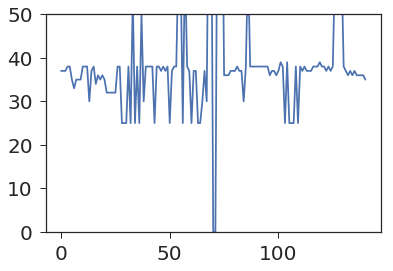

[374, 375]


In [7]:
xtalLengths = []
zeroentries = []
for i, entry in enumerate(t):
    if(t.caloNum > 24 or t.fillNum != 5):
        continue
    xtalLengths.append(len(t.xtal53))
    if(len(t.xtal53) == 0):
        zeroentries.append(i)
        print(t.caloNum, t.fillNum, t.islandNum)
        
plt.plot(xtalLengths)
plt.ylim(0,50)
plt.show()
print(zeroentries)

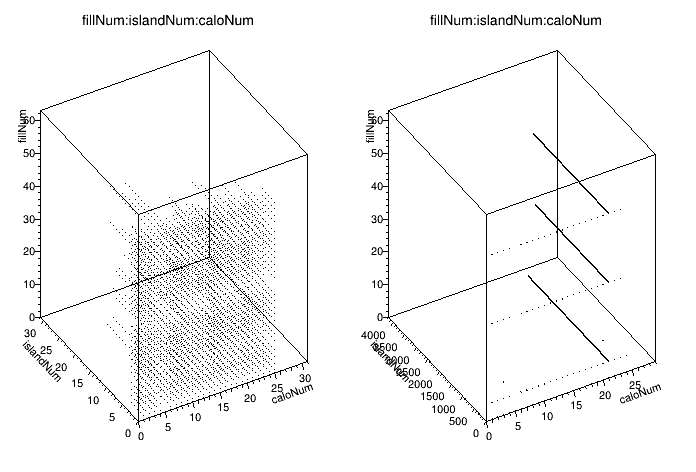

In [8]:
c = r.TCanvas()
c.Divide(2)
c.cd(1)
t.Draw("fillNum:islandNum:caloNum")
c.cd(2)
tt.Draw("fillNum:islandNum:caloNum")
c.Draw()

In [9]:
print(t.GetEntries())

3705


Calo:  2
Entry # 310


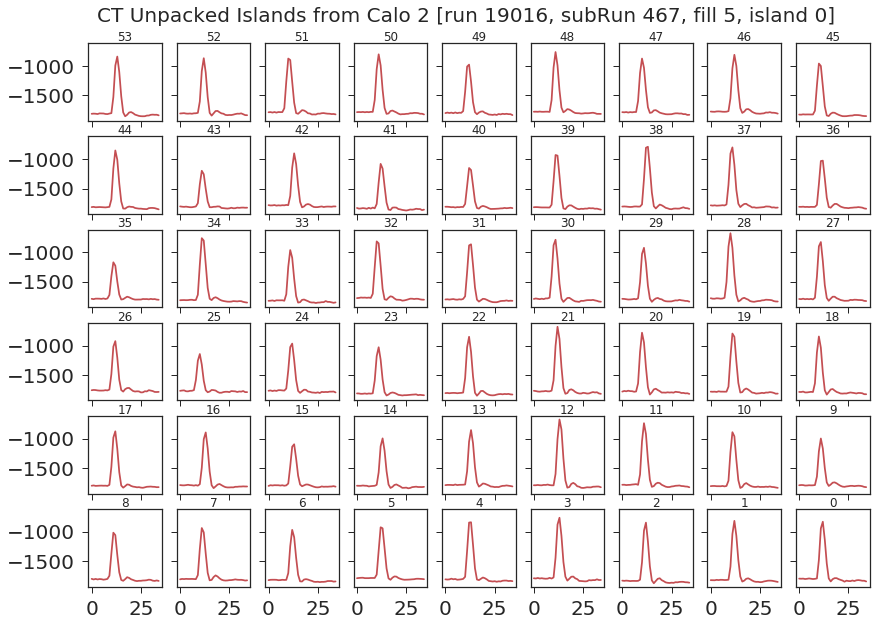

Entry # 311


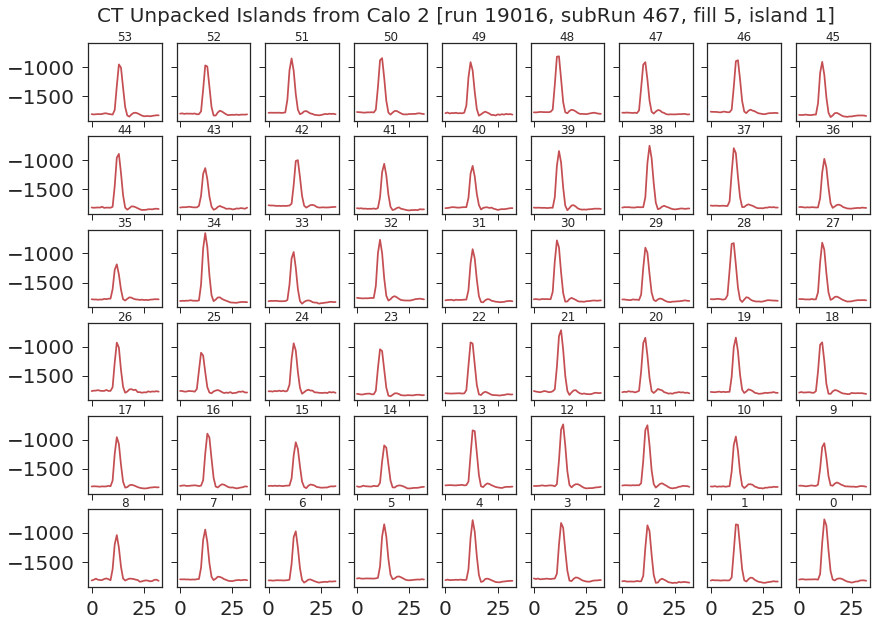

Entry # 312


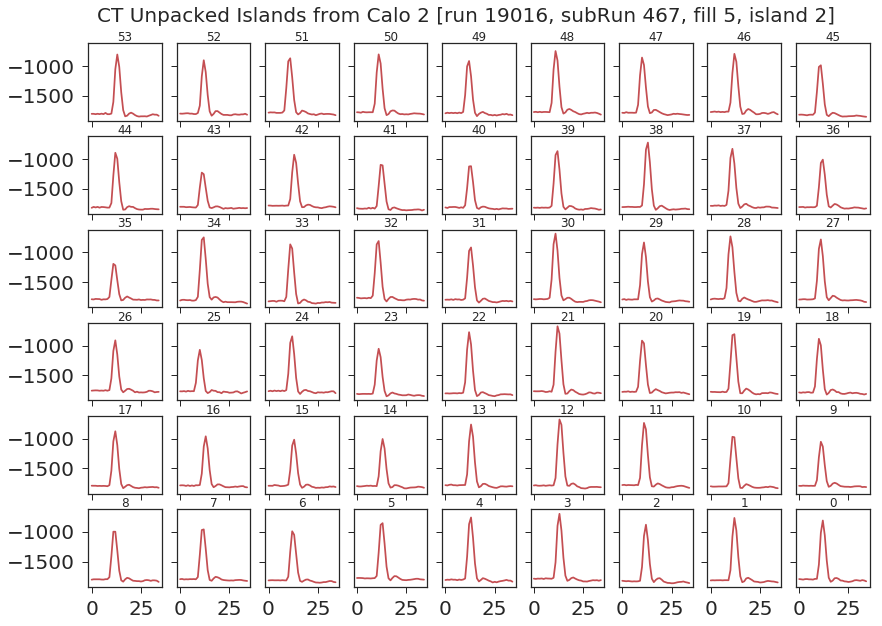

Entry # 313


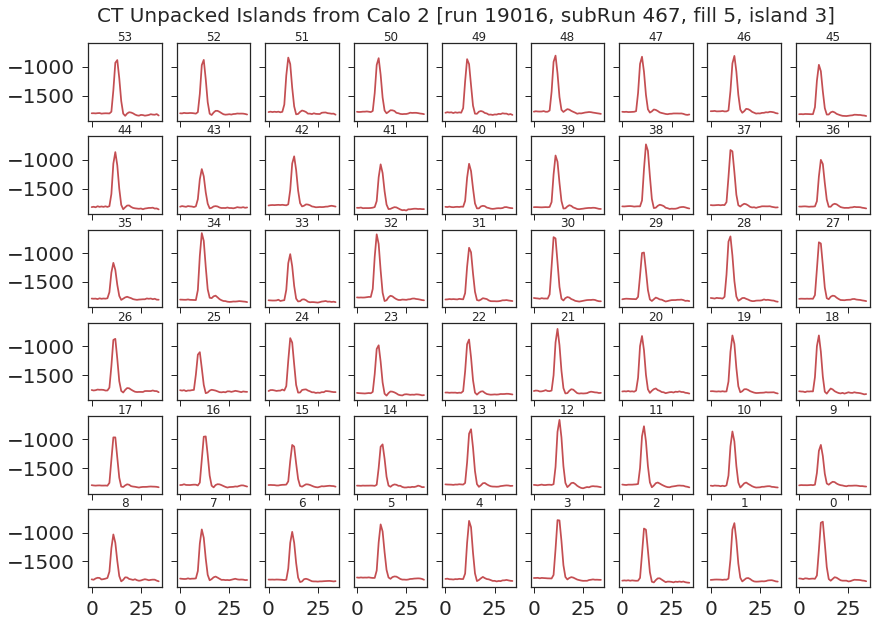

Entry # 314


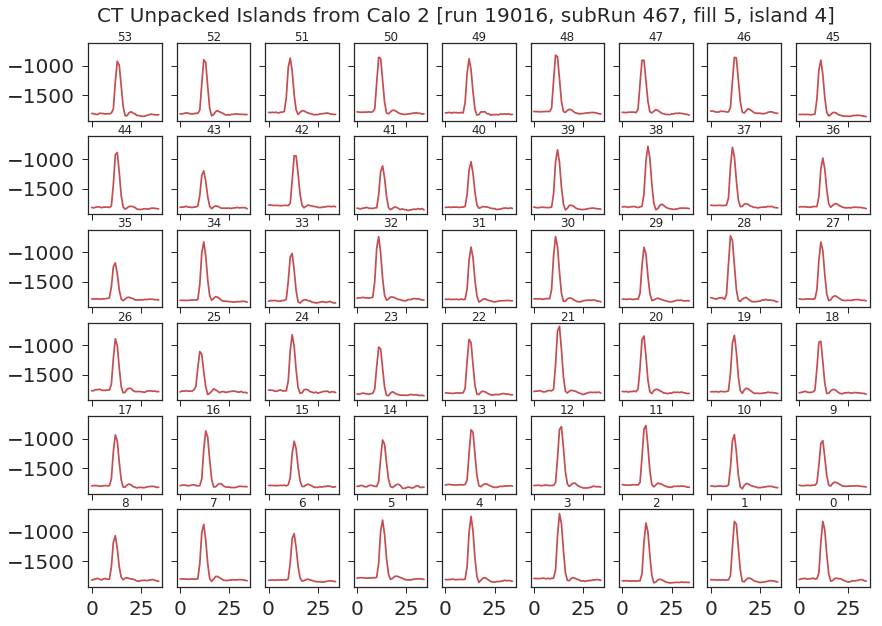

In [19]:
for caloNum in range(2,3):
    counter = 0
    print("Calo: ", caloNum)
    for i,entry in enumerate(t):
        if(int(t.caloNum) == caloNum):
            if (t.fillNum != 5):
                continue
            if i < 0:
                continue
            if counter > 1000:
                break
            counter = counter + 1

            fig, axarr = plt.subplots(6,9, sharey=True, sharex=True,figsize=(14, 10))
            print("Entry #", i+1)
            plotVec = []
            for crystal in range(0,54):
                branchString = "t.xtal"+str(crystal)
                entryVeci = []
                rootVec = eval(branchString)# t.xtal53
                length = rootVec.size()
                for ding in range(length):
                    entryVeci.append( rootVec[ding] )
                plotVec.append(entryVeci)

            plotVec.reverse()
            list1 = []
            list2 = []
            xtal = []
            list2xtal = []
            for crystal in range(54):
                list2.append(plotVec[crystal]) 
                list2xtal.append(crystal)
                if (crystal+1) % 9 == 0: #split into 9 column blocks
                    list1.append(list2)
                    list2 = []
                    list2xtal.reverse()
                    xtal.append(list2xtal)
                    list2xtal = []
            xtal.reverse()


            for ding in range(9):
                for j in range(6):
                    if(len(list1[j][ding]) < 1):
                        axarr[j,ding].plot(list1[j][ding],color='g') 
                    elif(np.abs( (list1[j][ding])[0] - np.max(list1[j][ding]) ) > 500):
                        axarr[j,ding].plot(list1[j][ding],color='r') 
                    else:
                        axarr[j,ding].plot(list1[j][ding],color='b') 
                    axarr[j,ding].set_title(str(xtal[j][ding]),y = 0.95)
#                    axarr[j,ding].set_yticklabels([])
#                    axarr[j,ding].set_xticklabels([])

            plt.suptitle("CT Unpacked Islands from Calo "+str(t.caloNum)
                         +" [run "+str(t.runNum)+", subRun "+str(t.subRunNum)
                         +", fill "+str(t.fillNum)+", island "+str(t.islandNum)+"]"
                         ,y = 0.93, fontsize=20)

            plt.savefig("./images/UnpackedIslands_CT_calo"+str(t.caloNum).zfill(2)+"_run"+str(runNum)+"_subRun"+subRunNum
                        +"_entry"+str(i)+".png",bbox_inches='tight')
            plt.show()


In [24]:
print(counter)

7


Calo:  2
Entry # 6


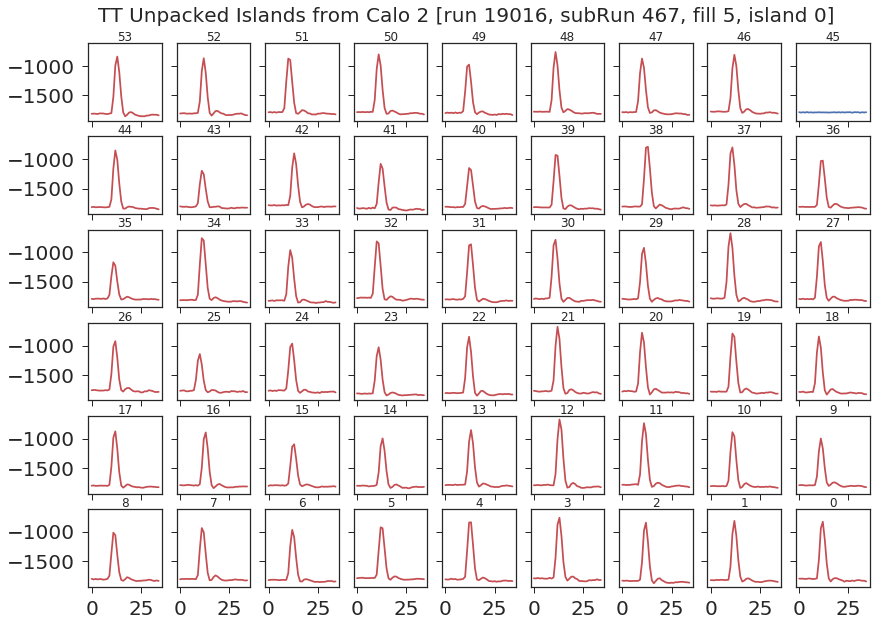

Entry # 7


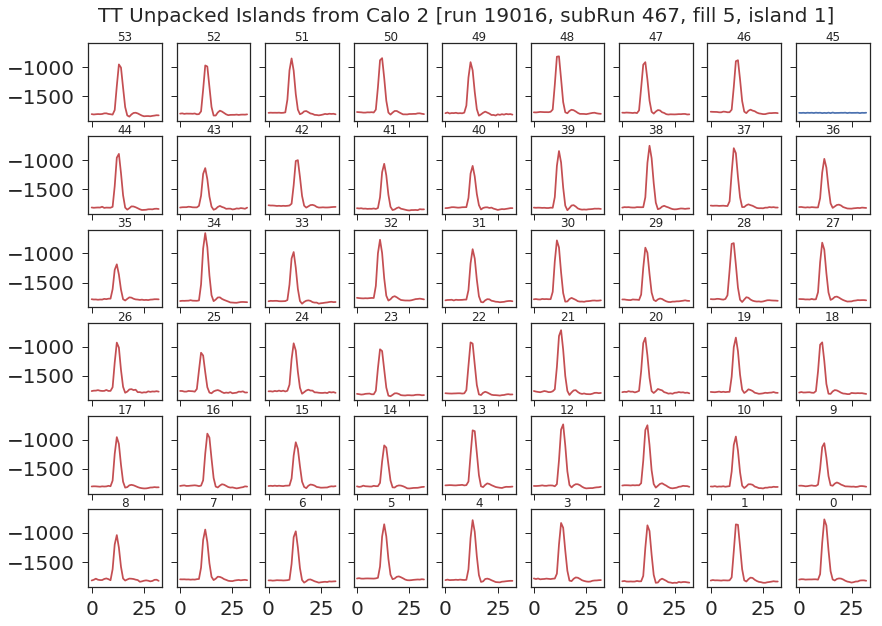

Entry # 8


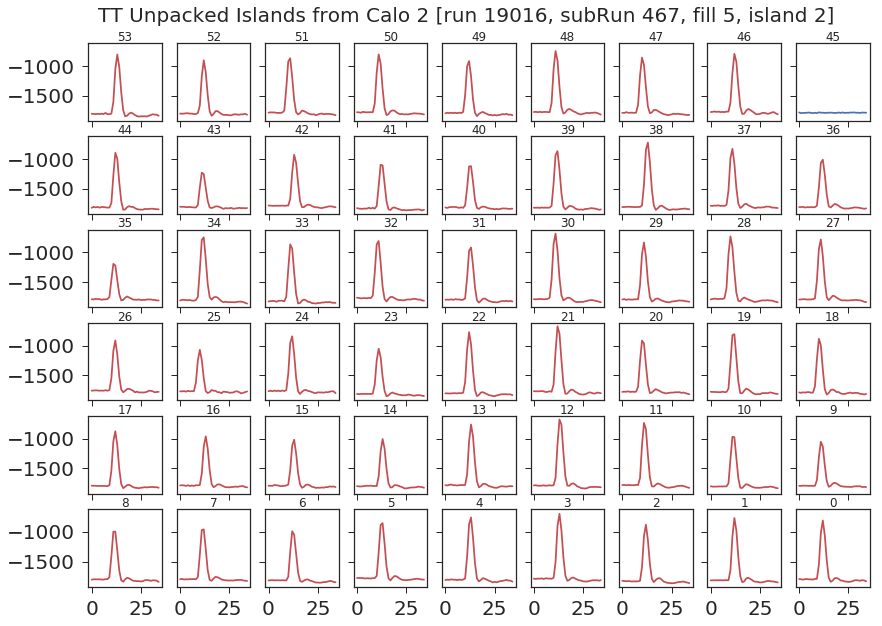

Entry # 9


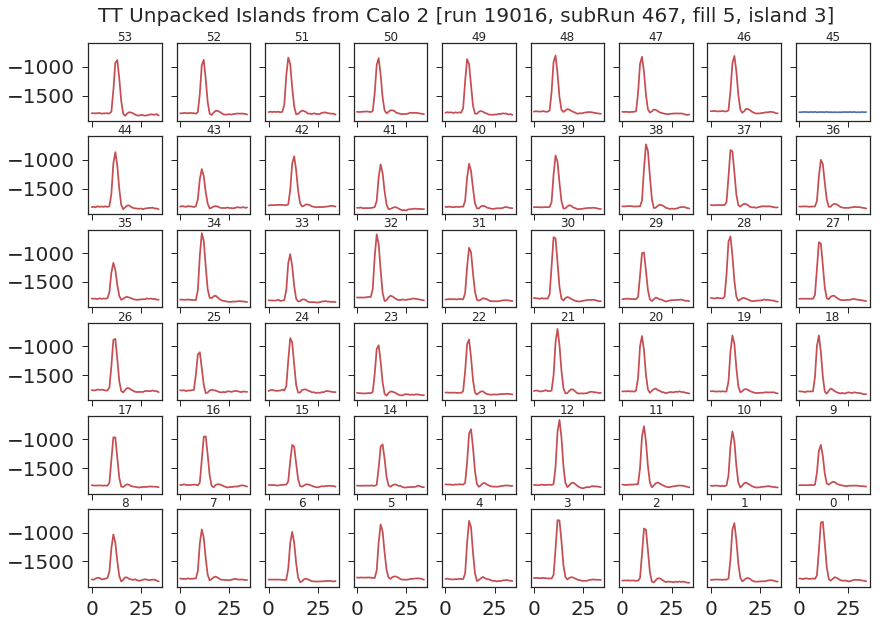

Entry # 10


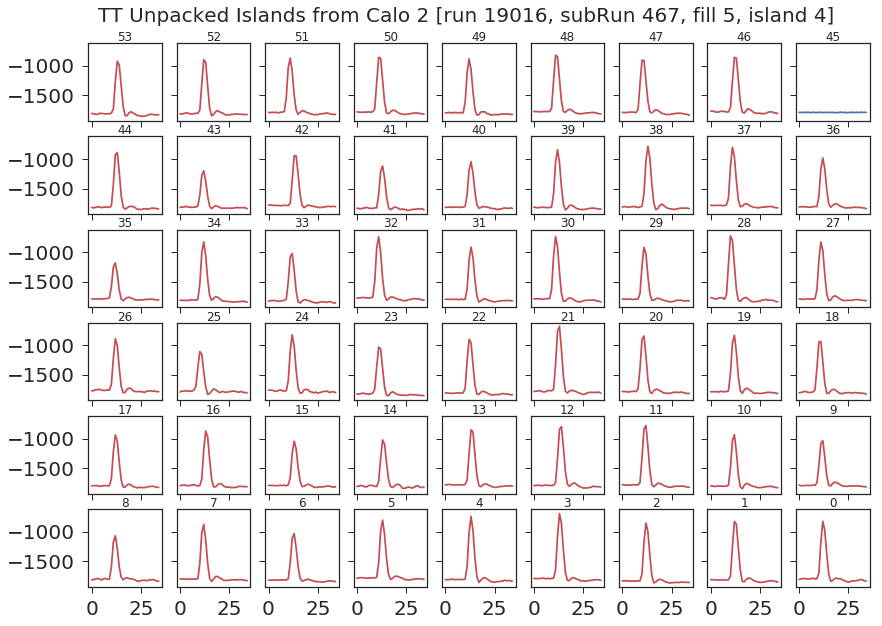

In [20]:
for caloNum in range(2,3):
    counter = 0
    print("Calo: ", caloNum)
    for i,entry in enumerate(tt):
        if(int(tt.caloNum) == caloNum):
            if (tt.fillNum != 5):
                continue
            if i < 0:
                continue
            if counter > 1000:
                break
            counter = counter + 1

            fig, axarr = plt.subplots(6,9, sharey=True, sharex=True,figsize=(14, 10))
            print("Entry #", i+1)
            plotVec = []
            for crystal in range(0,54):
                branchString = "tt.xtal"+str(crystal)
                entryVeci = []
                rootVec = eval(branchString)# tt.xtal53
                length = rootVec.size()
                for ding in range(length):
                    entryVeci.append( rootVec[ding] )
                plotVec.append(entryVeci)

            plotVec.reverse()
            list1 = []
            list2 = []
            xtal = []
            list2xtal = []
            for crystal in range(54):
                list2.append(plotVec[crystal]) 
                list2xtal.append(crystal)
                if (crystal+1) % 9 == 0: #split into 9 column blocks
                    list1.append(list2)
                    list2 = []
                    list2xtal.reverse()
                    xtal.append(list2xtal)
                    list2xtal = []
            xtal.reverse()


            for ding in range(9):
                for j in range(6):
                    if(len(list1[j][ding]) < 1):
                        axarr[j,ding].plot(list1[j][ding],color='g') 
                    elif(np.abs( (list1[j][ding])[0] - np.max(list1[j][ding]) ) > 500):
                        axarr[j,ding].plot(list1[j][ding],color='r') 
                    else:
                        axarr[j,ding].plot(list1[j][ding],color='b') 
                    axarr[j,ding].set_title(str(xtal[j][ding]),y = 0.95)
#                    axarr[j,ding].set_yticklabels([])
#                    axarr[j,ding].set_xticklabels([])

            plt.suptitle("TT Unpacked Islands from Calo "+str(tt.caloNum)
                         +" [run "+str(tt.runNum)+", subRun "+str(tt.subRunNum)
                         +", fill "+str(tt.fillNum)+", island "+str(tt.islandNum)+"]"
                         ,y = 0.93, fontsize=20)

            plt.savefig("./images/UnpackedIslands_TT_calo"+str(tt.caloNum).zfill(2)+"_run"+str(runNum)+"_subRun"+subRunNum
                        +"_entry"+str(i)+".png",bbox_inches='tight')
            plt.show()


In [27]:
print(counter)

7


Now lets do the same thing with the histograms already stored in the root file

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TDirectoryFile::Append>: Replacing existing TH1: herr (Potential memory leak).


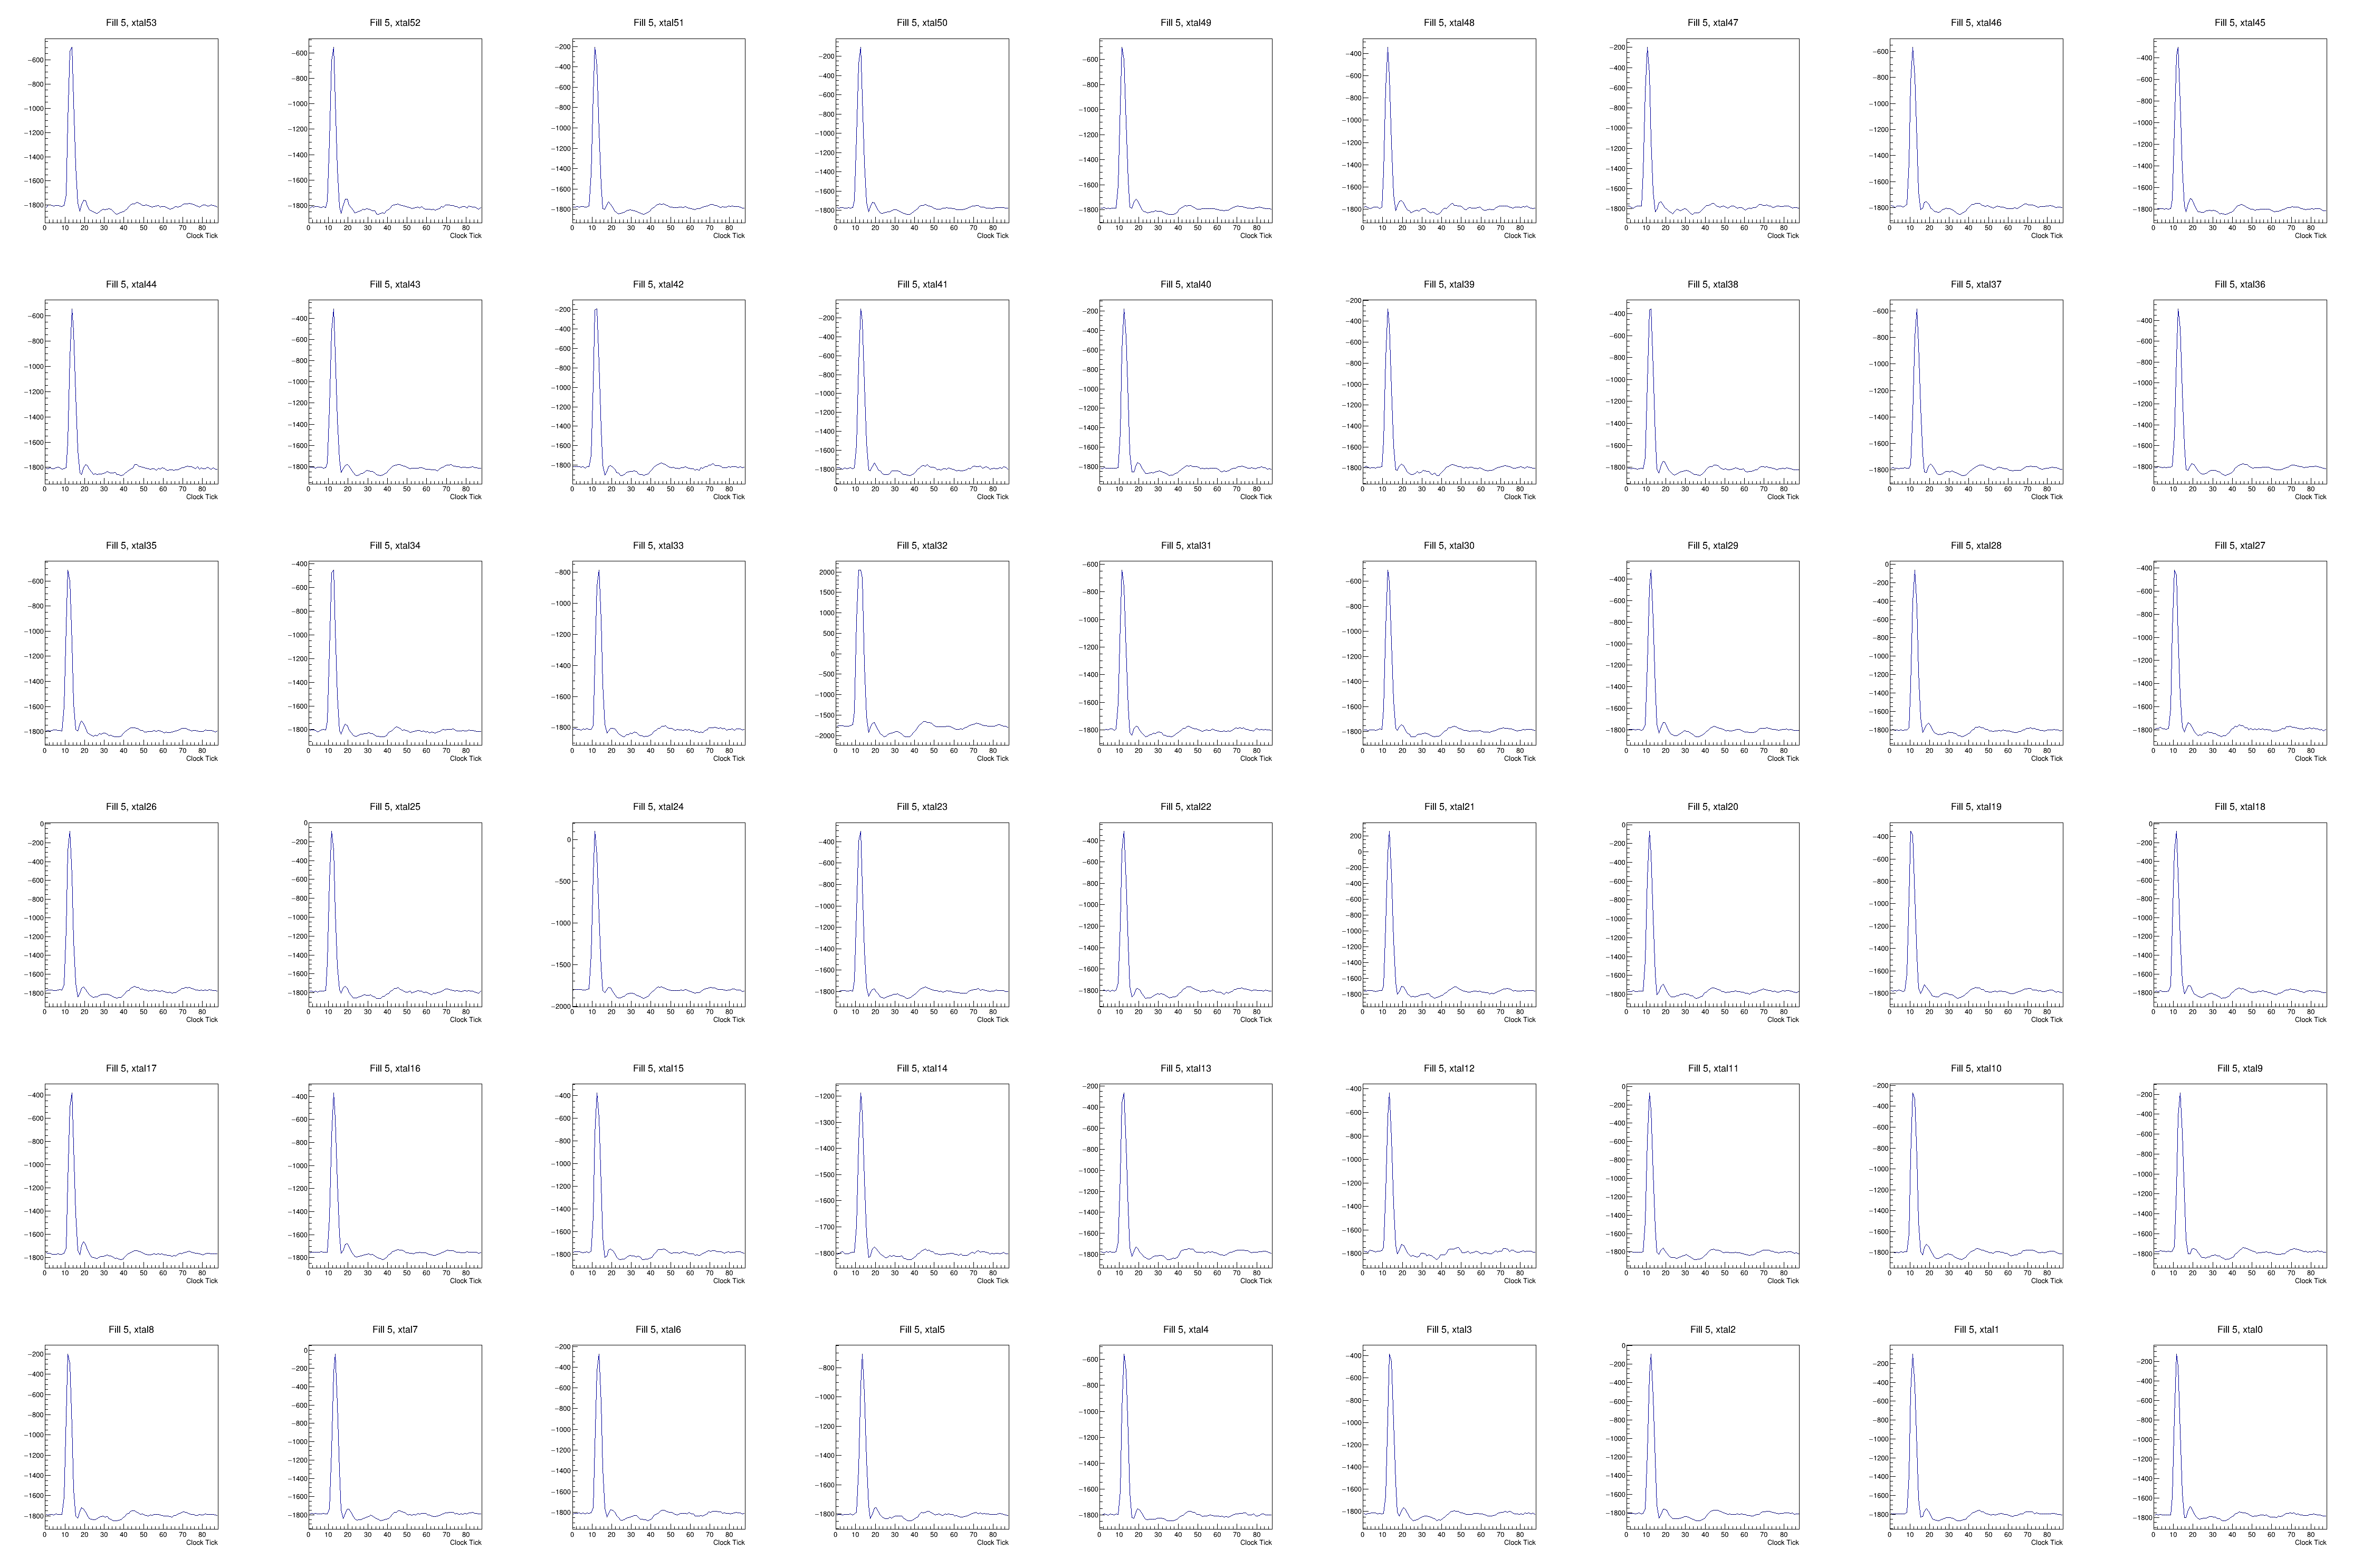

In [13]:
c = r.TCanvas("c","c",4500,3000)
c.Divide(9,6)
xtalVec = []

fillNum = 5
caloNum = 12
islandNum = 2

herr = r.TH1S("herr","",25,0,25)

for xtalNum in range(54):
    histname =  str("island_run_"+str(runNum)+"_subRun_"+str(int(subRunNum))
                 +"_fill_"+str(fillNum)+"_calo_"+str(caloNum)+"_xtal_"
                 +str(xtalNum)+"_island_"+str(islandNum))
    try:
        hi = fct.Get("islands").Get("fill"+str(fillNum)).Get("calo"+str(caloNum)).Get(histname).Clone()
    except:
        hi = herr.Clone("herr"+str(xtalNum))
        
    xtalVec.append( hi.Clone() )
    c.cd(53-xtalNum+1)
    xtalVec[xtalNum].Draw("pl")

c.Draw()

This is the same plot created from the other set of banks

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


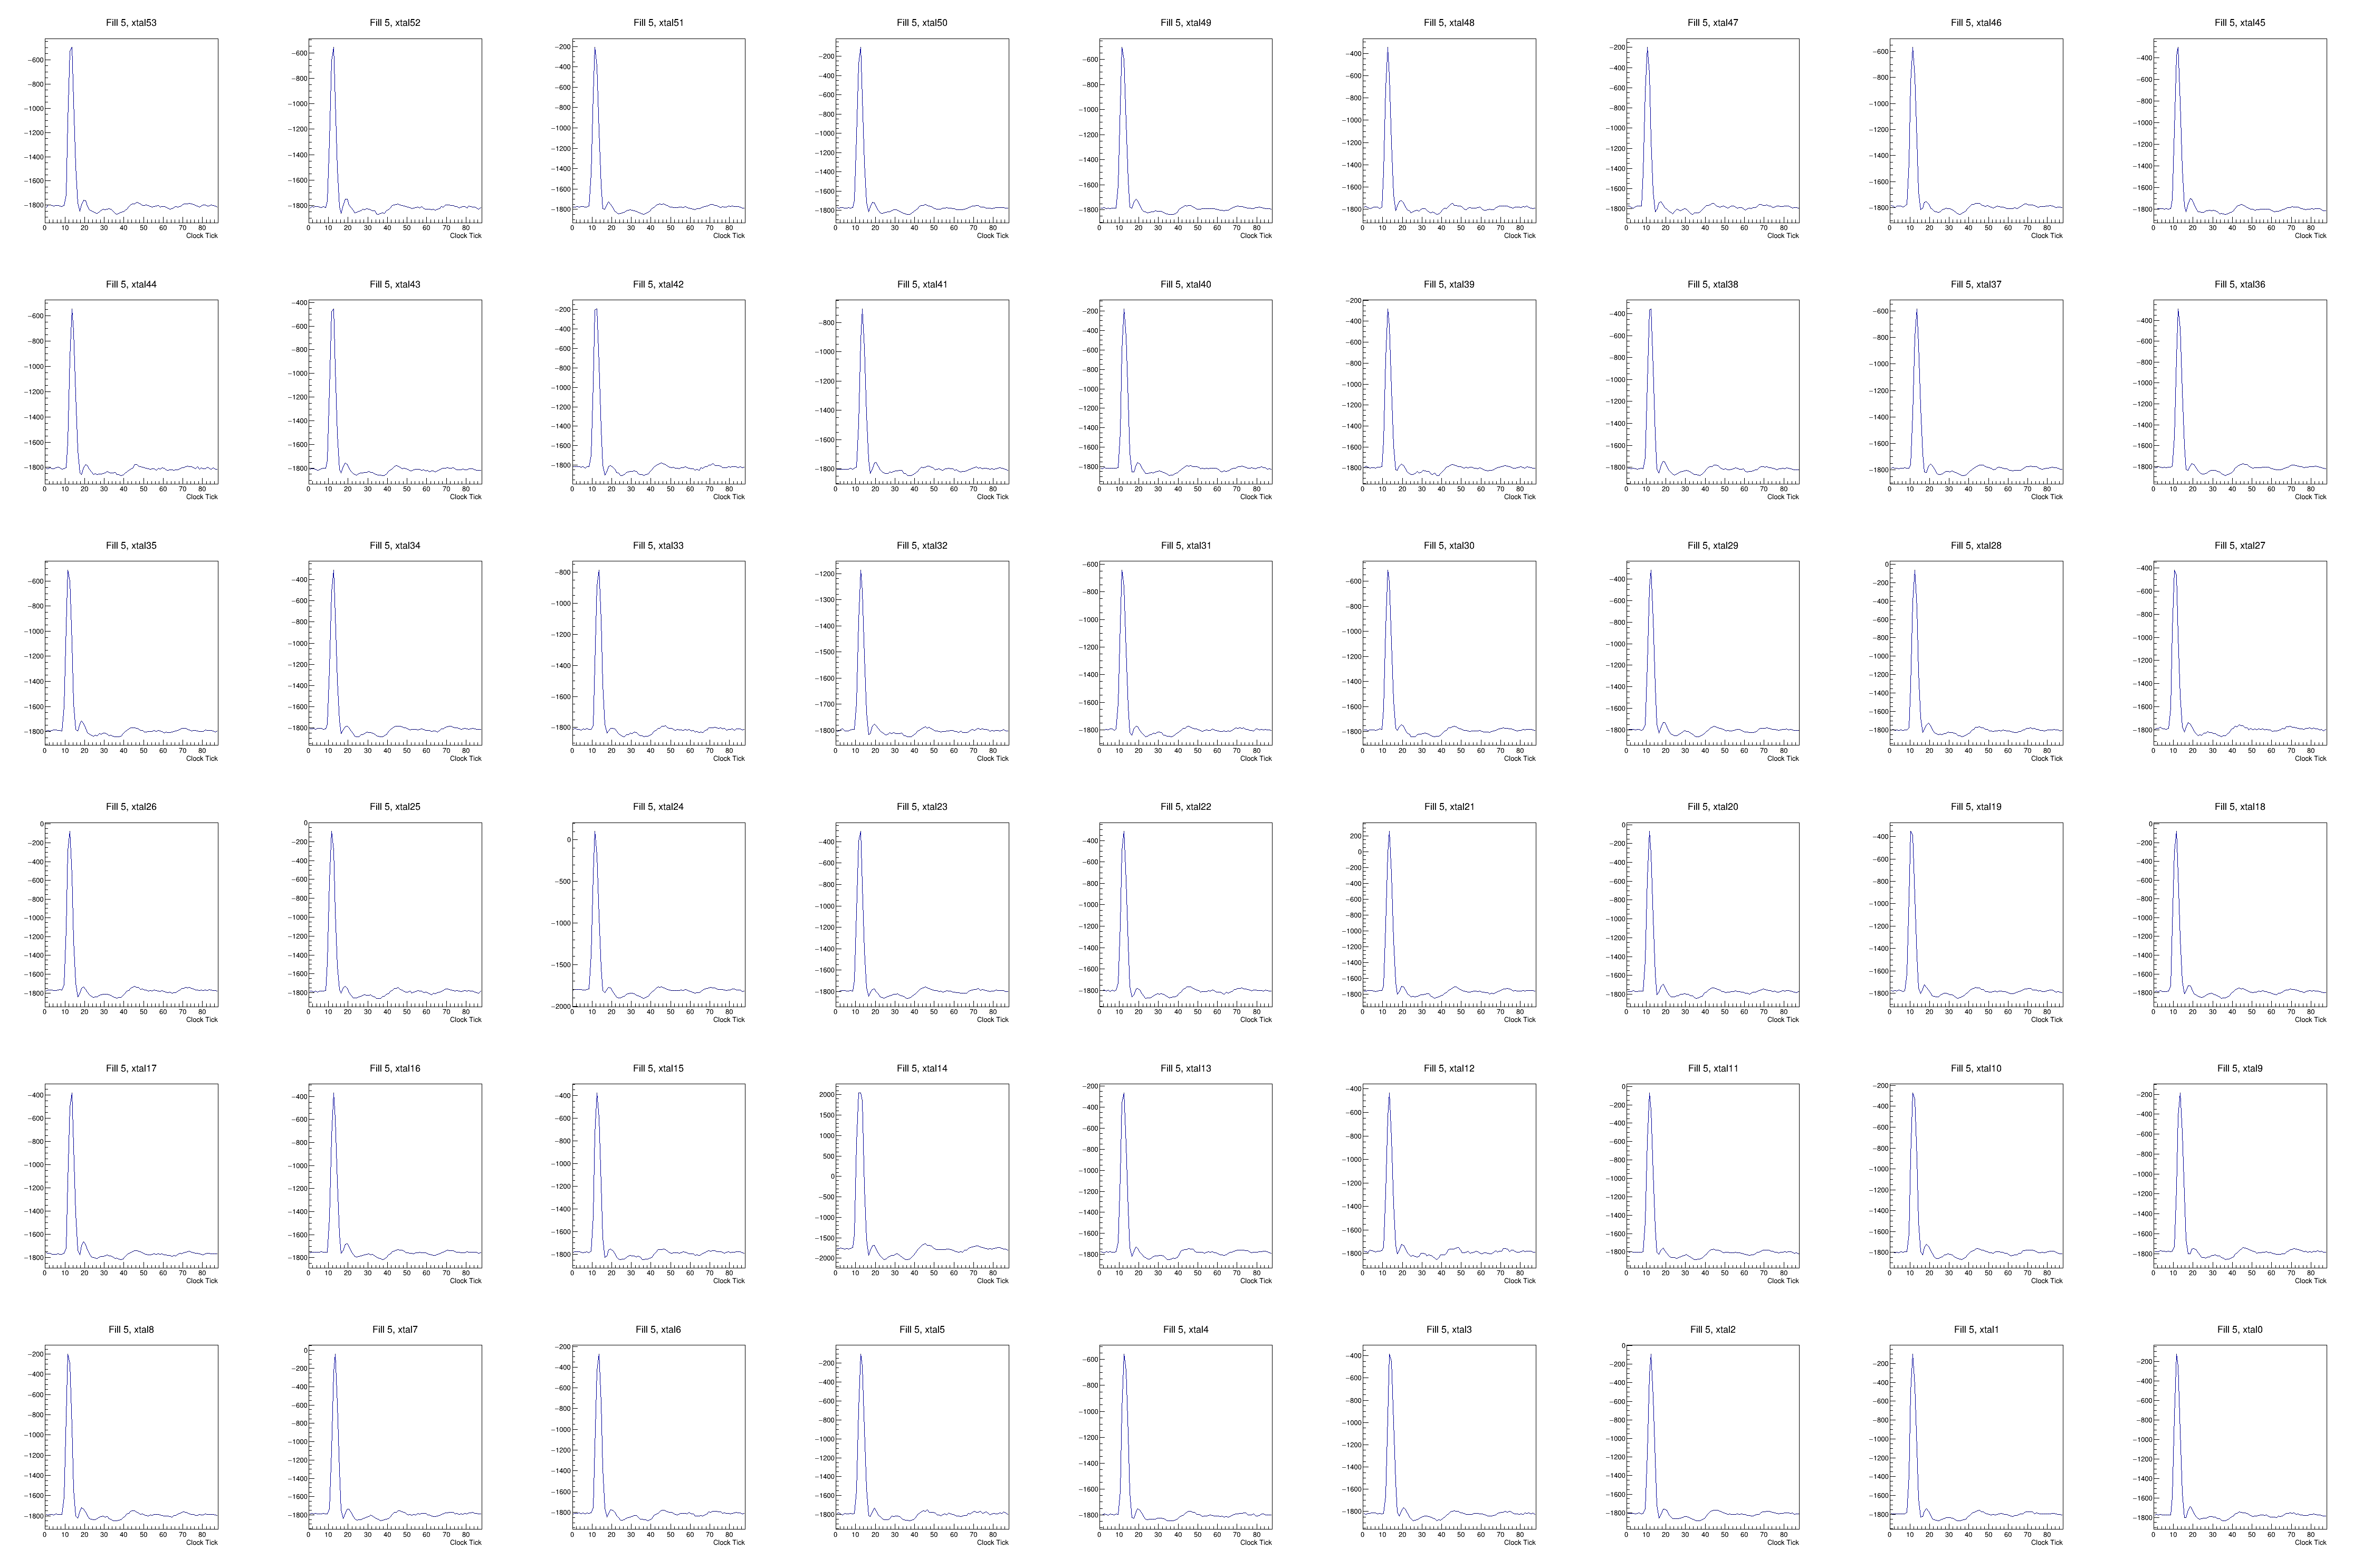

In [14]:
c = r.TCanvas("c","c",4500,3000)
c.Divide(9,6)
xtalVecTT = []

for xtalNum in range(54):
    histname =  str("island_run_"+str(runNum)+"_subRun_"+str(int(subRunNum))
                 +"_fill_"+str(fillNum)+"_calo_"+str(caloNum)+"_xtal_"
                 +str(xtalNum)+"_island_"+str(islandNum))
    try:
        hi = ftt.Get("islands").Get("fill"+str(fillNum)).Get("calo"+str(caloNum)).Get(histname).Clone()
    except:
        hi = herr.Clone("herr"+str(xtalNum))
        
    xtalVecTT.append( hi.Clone() )
    c.cd(53-xtalNum+1)
    xtalVecTT[xtalNum].Draw("pl")

c.Draw()

Now we can make the difference histograms, subtracting the plots in these two canvases

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


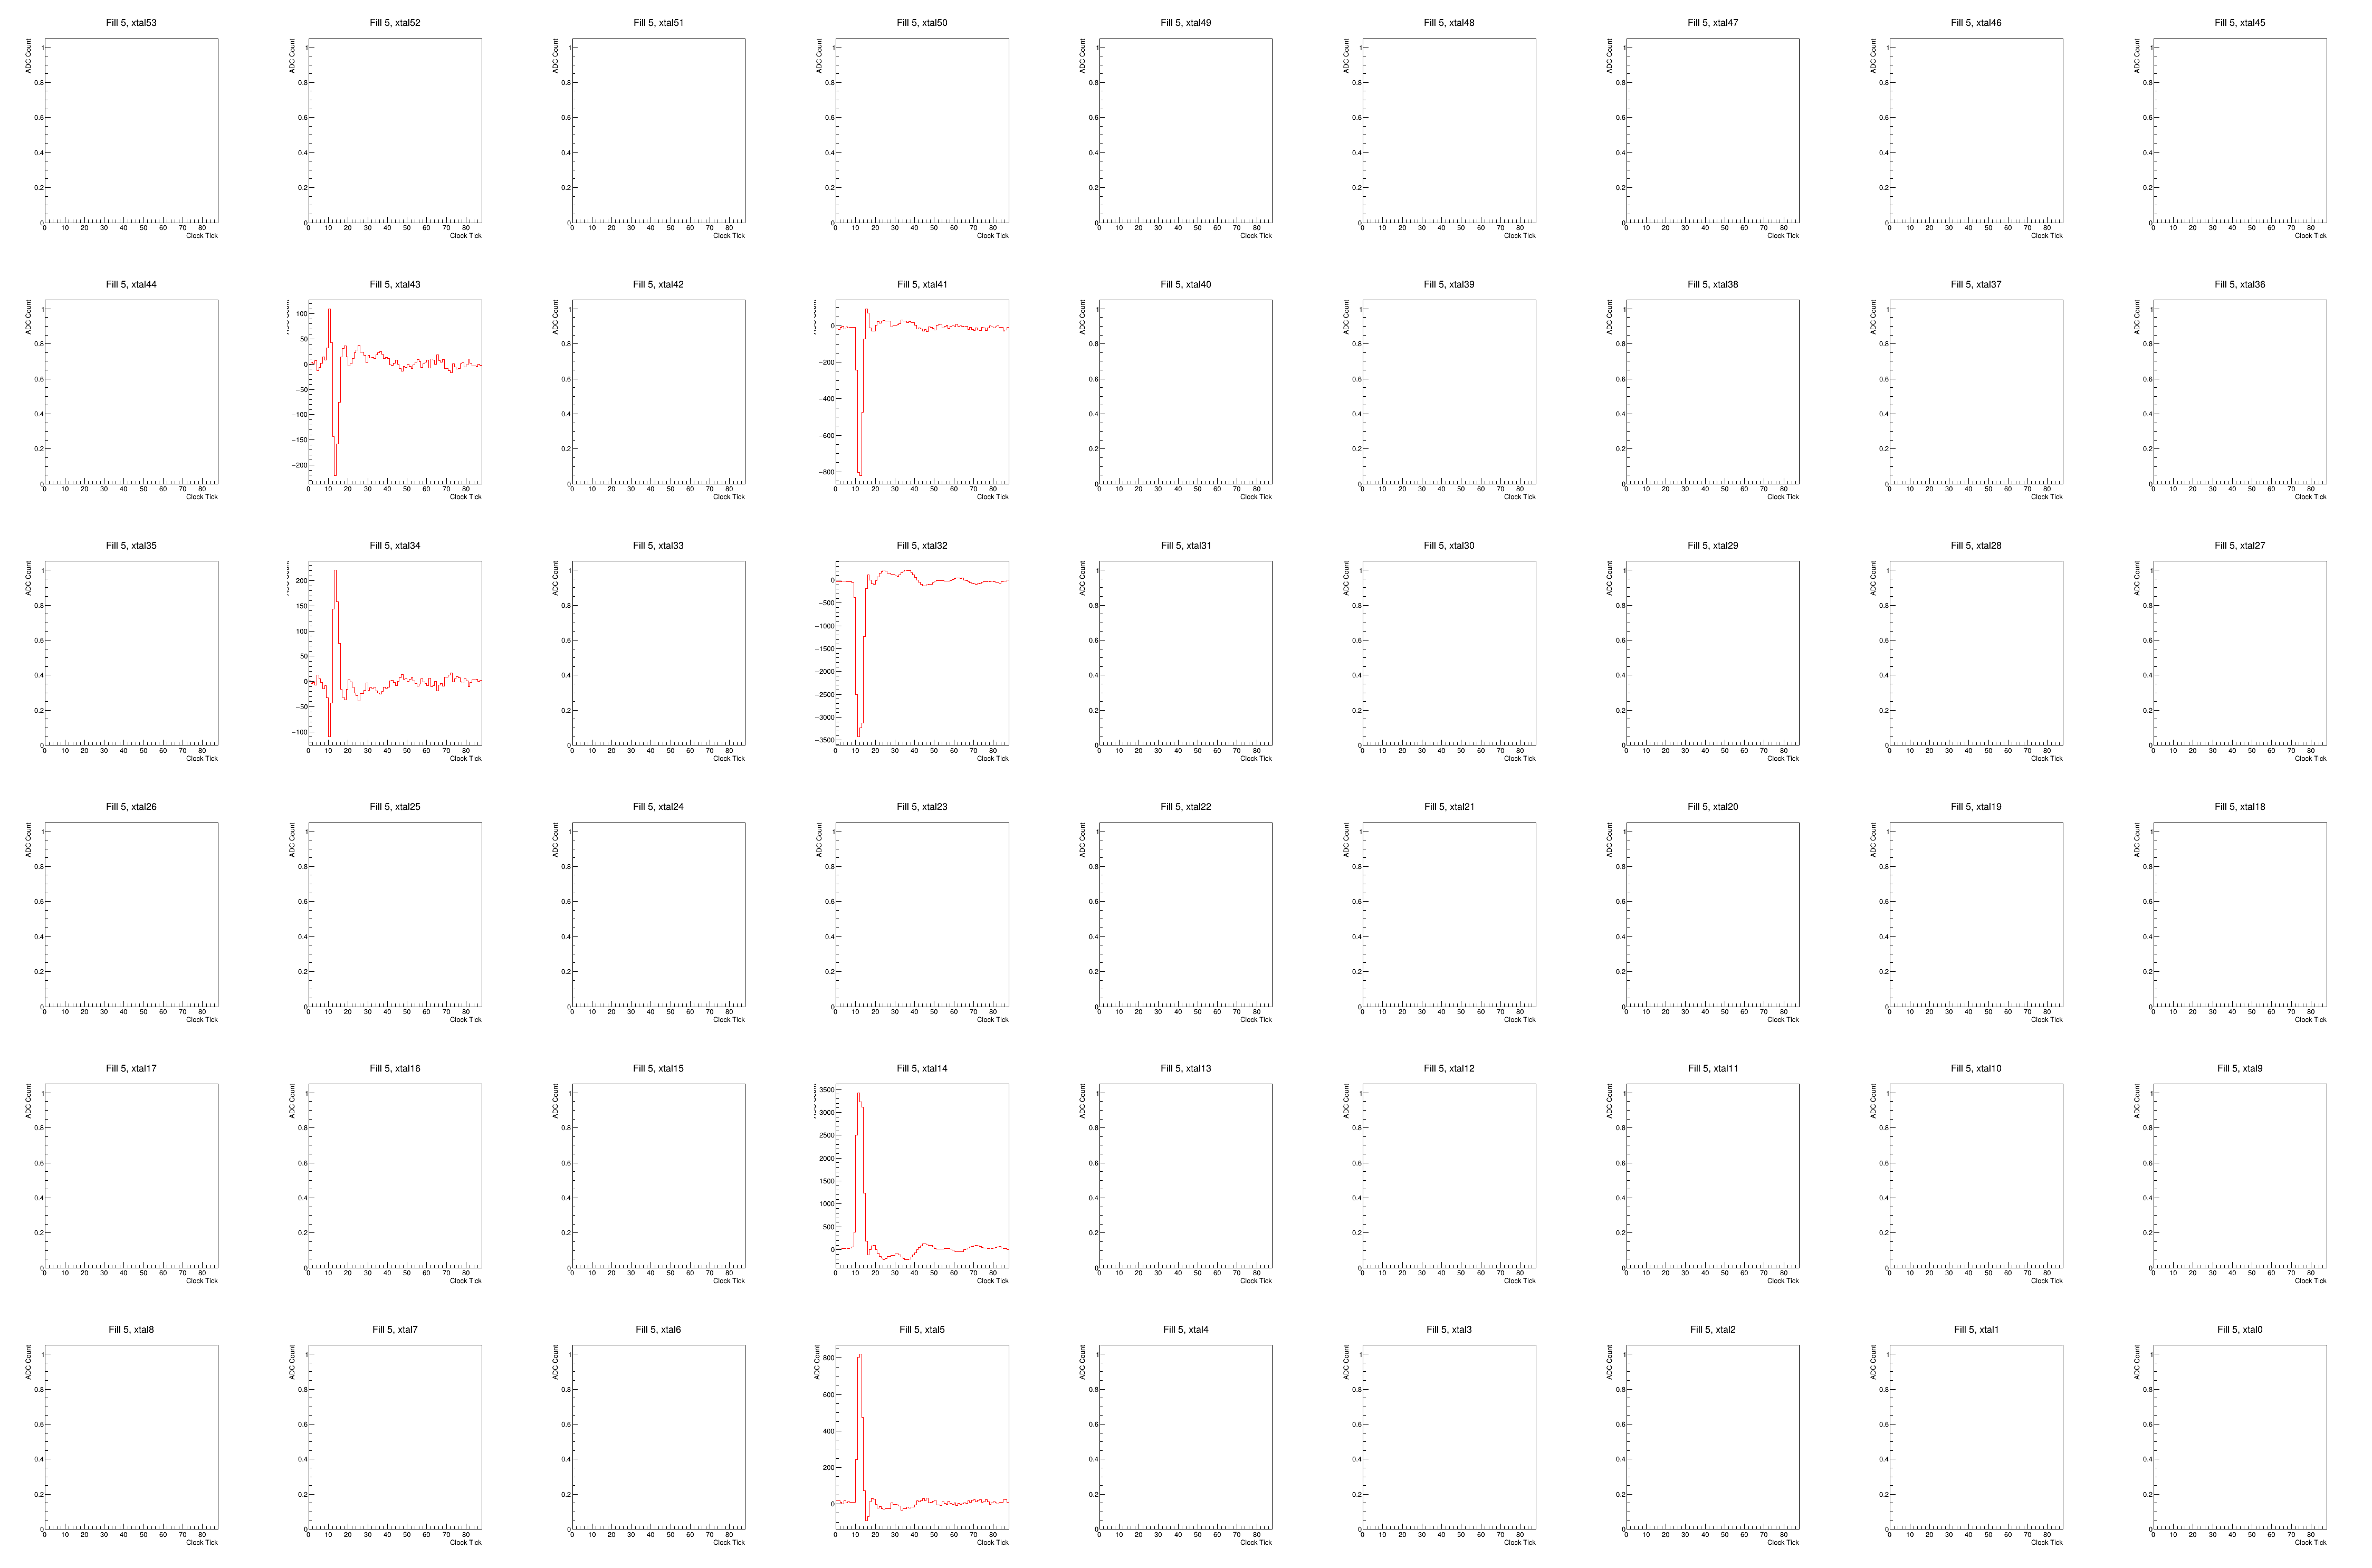

In [16]:
c2 = r.TCanvas("c2","c2",4500,3000)
c2.Divide(9,6)

diffVec = []

for xtalNum in range(54):
    hi = xtalVecTT[xtalNum].Clone()
    if(hi.GetNbinsX() == xtalVec[xtalNum].GetNbinsX()):
        hi.Add(xtalVec[xtalNum],-1)
    else:
        #here we assume that the starts of the islands are always aligned, and the tails might have different lengths
        for bin in range(hi.GetNbinsX()):
            if bin > xtalVec[xtalNum].GetNbinsX():
                #print(bin)
                deltaBin = 0
            else:
                deltaBin = hi.GetBinContent(bin) - xtalVec[xtalNum].GetBinContent(bin)
            hi.SetBinContent(bin,deltaBin)
            
        #hi.Add(xtalVec[xtalNum],-1)
    diffVec.append(hi.Clone())
    
    c2.cd(53-xtalNum+1)
    diffVec[xtalNum].SetLineColor(2)
    diffVec[xtalNum].Draw()
c2.Draw()

In [72]:
minMaxVec = []
for i, hi in enumerate(diffVec):
    a = r.Double(0.00)
    b = r.Double(0.00)
    hi.GetMinimumAndMaximum(a,b)
    minMaxVec.append((i, a,b, b-a))
    if b-a > 50:
        print(i, b-a)

14 84.0
32 82.0


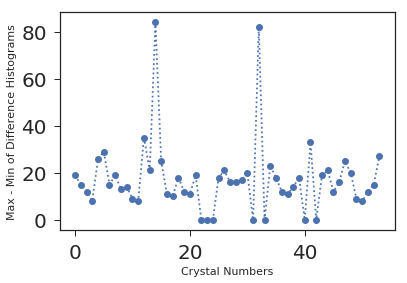

In [73]:
xtals, diffMin, diffMax, deltaMinMax = zip(*minMaxVec)
plt.plot(xtals,deltaMinMax,'o:')
plt.xlabel("Crystal Numbers")
plt.ylabel("Max - Min of Difference Histograms")
plt.show()

Calo:  1
Calo:  2
    Possible mismatched crystal in calo:  2  -> xtal:  45 (difference:  870.0 )
Calo:  3
Calo:  4
Calo:  5
    ERROR: This island does not exist in this calorimeter
Calo:  6
    Possible mismatched crystal in calo:  6  -> xtal:  43 (difference:  53.0 )
    Possible mismatched crystal in calo:  6  -> xtal:  51 (difference:  125.0 )
Calo:  7
    Possible mismatched crystal in calo:  7  -> xtal:  0 (difference:  1500.0 )
Calo:  8
Calo:  9
Calo:  10
Calo:  11
Calo:  12
    Possible mismatched crystal in calo:  12  -> xtal:  5 (difference:  914.0 )
    Possible mismatched crystal in calo:  12  -> xtal:  14 (difference:  3647.0 )
    Possible mismatched crystal in calo:  12  -> xtal:  32 (difference:  3647.0 )
    Possible mismatched crystal in calo:  12  -> xtal:  34 (difference:  331.0 )
    Possible mismatched crystal in calo:  12  -> xtal:  41 (difference:  914.0 )
    Possible mismatched crystal in calo:  12  -> xtal:  43 (difference:  331.0 )
Calo:  13
Calo:  14
Calo:

Warning in <TDirectoryFile::Append>: Replacing existing TH1: herr (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file ./calo01_diff.png has been created
Warning in <TDirectoryFile::Append>: Replacing existing TH1: herr (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file ./calo02_diff.png has been created
Warning in <TDirectoryFile::Append>: Replacing existing TH1: herr (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file ./calo03_diff.png has been created
Warning in <TDirectoryFile::Append>: Replacing existing TH1: herr (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file ./calo04_diff.png has been created
Warning in <TDirectoryFile::Append>: Replacing existing TH1: herr (Potential

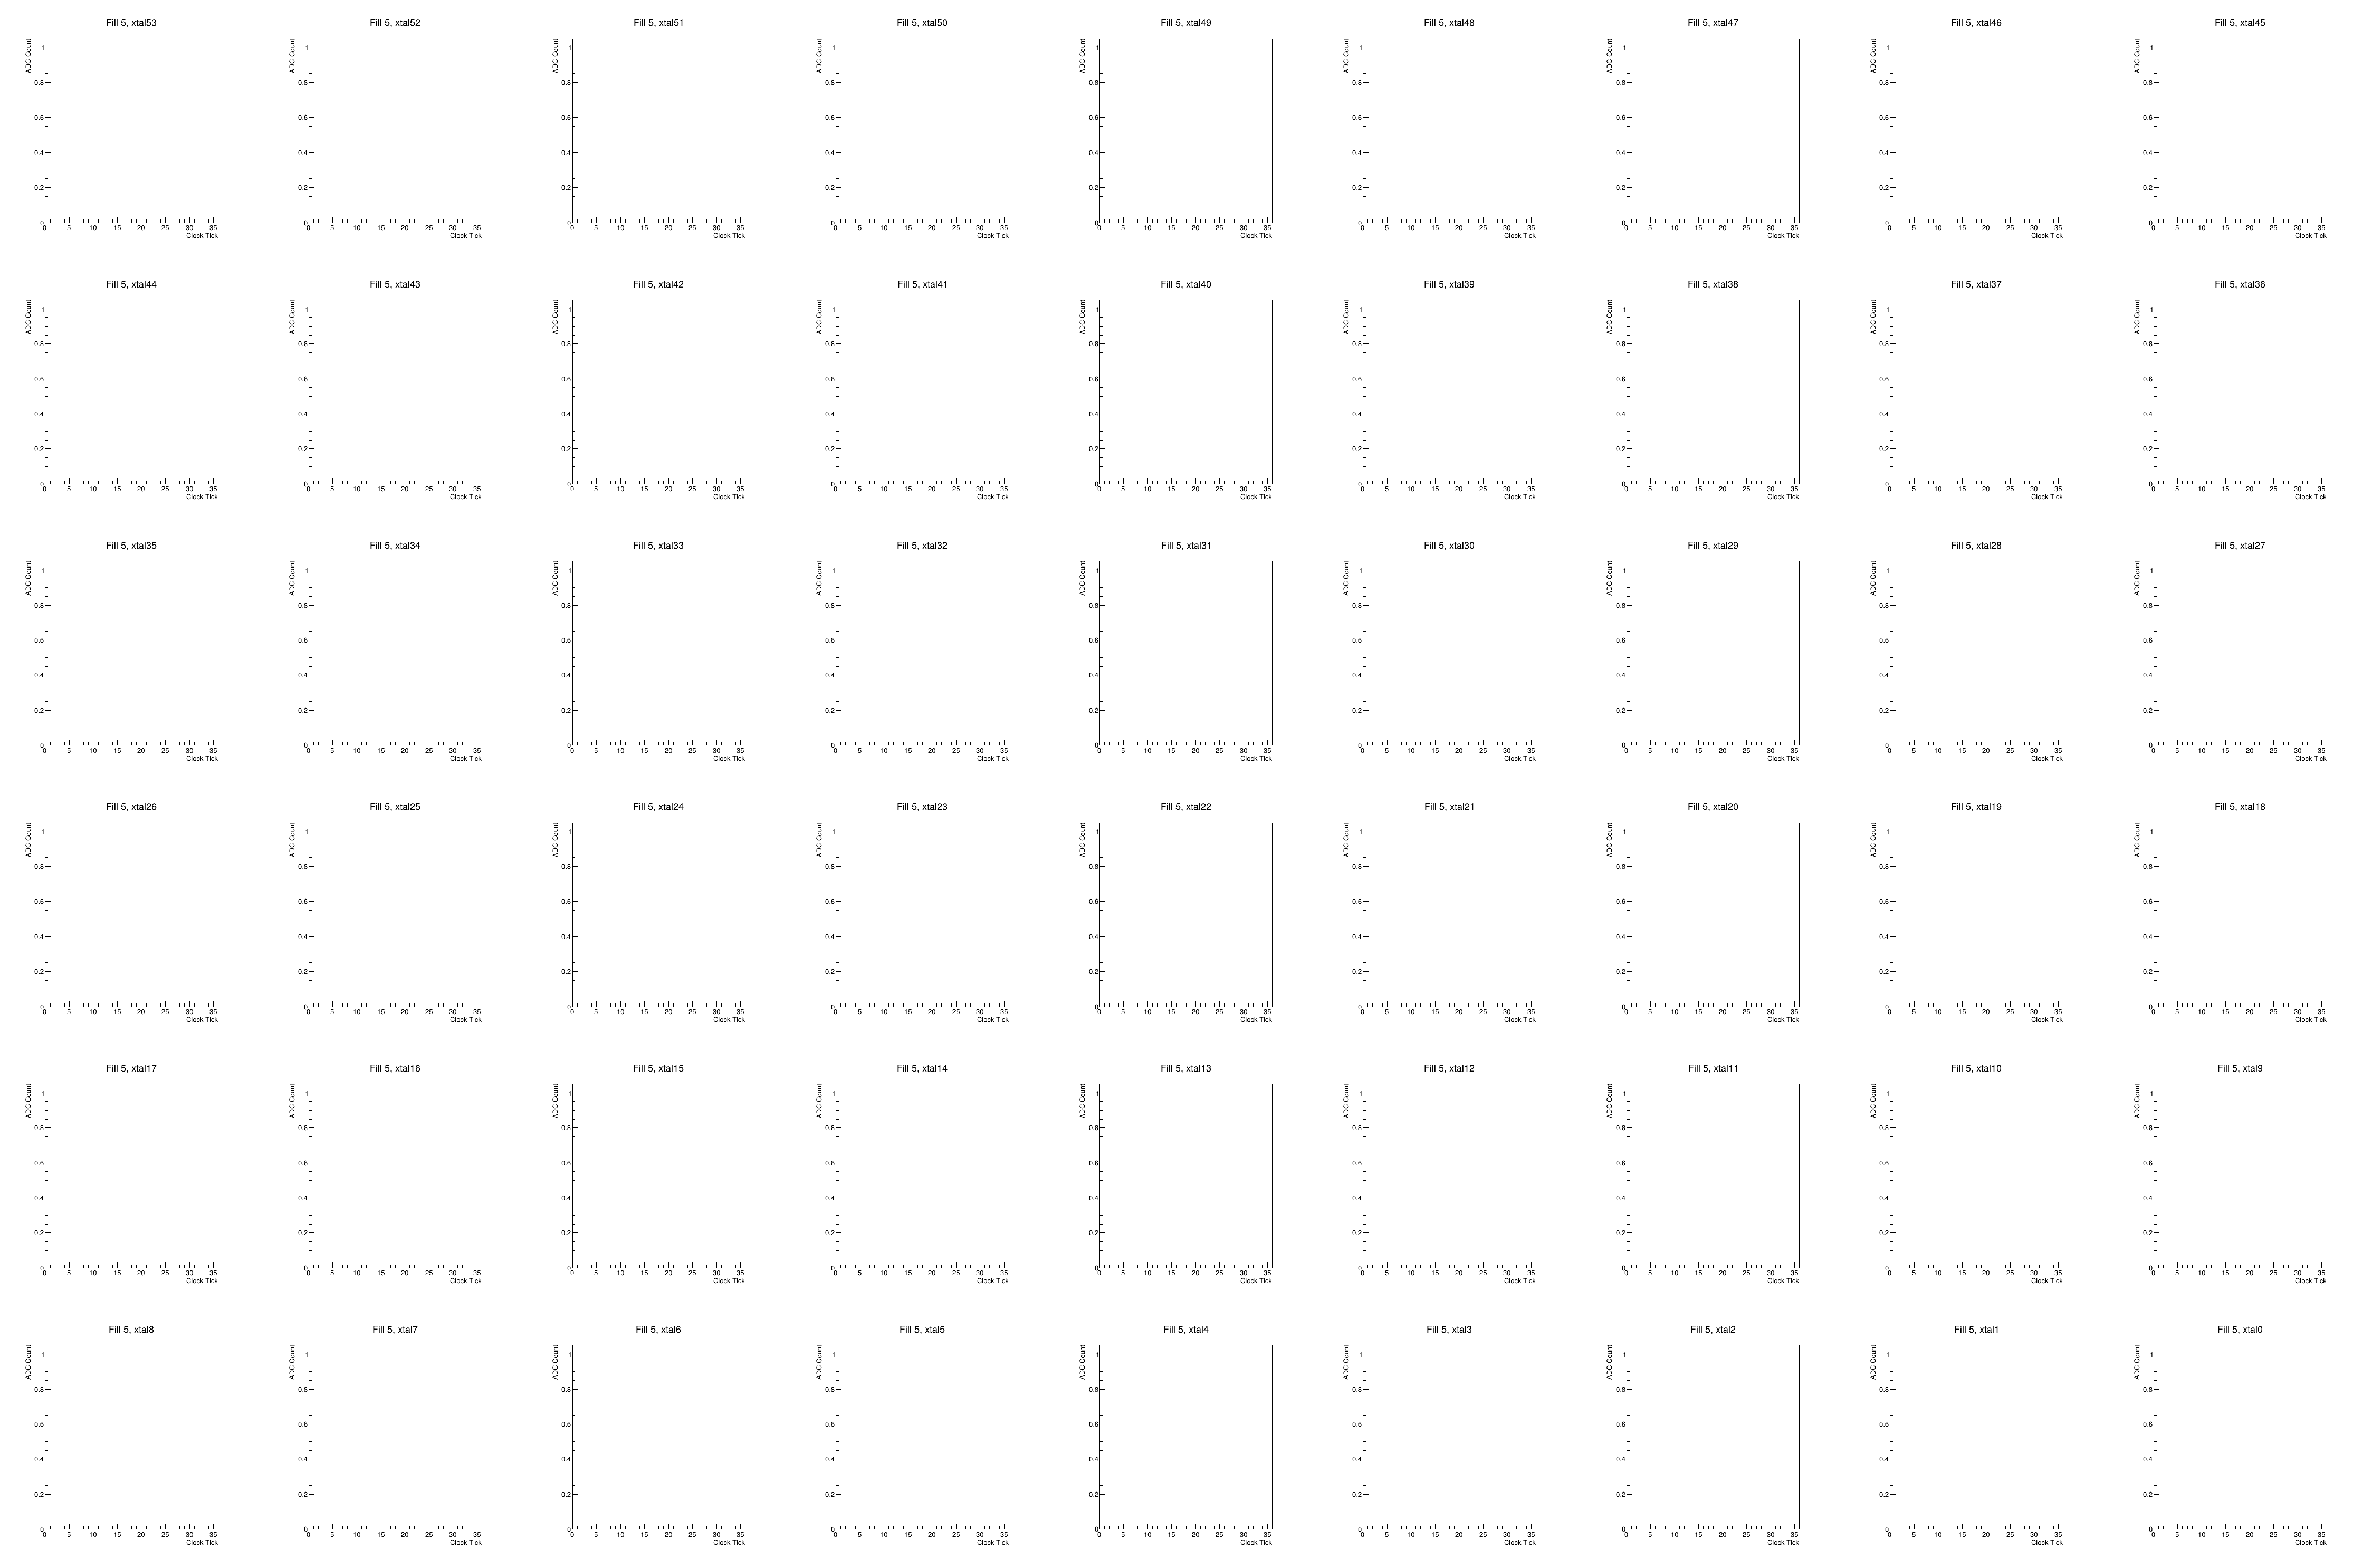

In [15]:
fillNum = 5
#caloNum = 12
islandNum = 2

for caloNum in range(1,25):
    if(caloNum == 21):
        continue
    print("Calo: ", caloNum)
    xtalVec = []
    
    nBins = 9999
    
    for xtalNum in range(54):
        histname =  str("island_run_"+str(runNum)+"_subRun_"+str(int(subRunNum))
                     +"_fill_"+str(fillNum)+"_calo_"+str(caloNum)+"_xtal_"
                     +str(xtalNum)+"_island_"+str(islandNum))
        try:
            hi = ftt.Get("islands").Get("fill"+str(fillNum)).Get("calo"+str(caloNum)).Get(histname).Clone()
            hi2 = fct.Get("islands").Get("fill"+str(fillNum)).Get("calo"+str(caloNum)).Get(histname).Clone()
            nBins = hi.GetNbinsX() - 2
            #print("   ",nBins)
            break
        except:
            ding = 0
    
    if nBins == 9999:
        print("    ERROR: This island does not exist in this calorimeter")
        continue
    
    herr = r.TH1S("herr","",nBins,0,nBins)
    for xtalNum in range(54):
        histname =  str("island_run_"+str(runNum)+"_subRun_"+str(int(subRunNum))
                     +"_fill_"+str(fillNum)+"_calo_"+str(caloNum)+"_xtal_"
                     +str(xtalNum)+"_island_"+str(islandNum))
        try:
            hi = fct.Get("islands").Get("fill"+str(fillNum)).Get("calo"+str(caloNum)).Get(histname).Clone()
        except:
            hi = herr.Clone("herr"+str(xtalNum))

        xtalVec.append( hi.Clone() )
        
    xtalVecTT = []
    for xtalNum in range(54):
        histname =  str("island_run_"+str(runNum)+"_subRun_"+str(int(subRunNum))
             +"_fill_"+str(fillNum)+"_calo_"+str(caloNum)+"_xtal_"
             +str(xtalNum)+"_island_"+str(islandNum))
        try:
            hi = ftt.Get("islands").Get("fill"+str(fillNum)).Get("calo"+str(caloNum)).Get(histname).Clone()
        except:
            hi = herr.Clone("herr"+str(xtalNum))

        xtalVecTT.append( hi.Clone() )
        
    c2 = r.TCanvas("c2","c2",4500,3000)
    c2.Divide(9,6)

    diffVec = []
    for xtalNum in range(54):
        hi = xtalVecTT[xtalNum].Clone()
        hi.Add(xtalVec[xtalNum],-1)
        
        a = r.Double(0.00)
        b = r.Double(0.00)
        hi.GetMinimumAndMaximum(a,b)
       
        if(b-a > 30):
            hi.SetLineColor(2)
            
        diffVec.append(hi.Clone())
        
        c2.cd(53-xtalNum+1)
        diffVec[xtalNum].Draw()
    c2.Draw()
    c2.Print("./calo"+str(caloNum).zfill(2)+"_diff.png")
    
    minMaxVec = []
    for i, hi in enumerate(diffVec):
        a = r.Double(0.00)
        b = r.Double(0.00)
        hi.GetMinimumAndMaximum(a,b)
        minMaxVec.append((i, a,b, b-a))
        if b-a > 50:
            print("    Possible mismatched crystal in calo: ", caloNum, " -> xtal: ", i,"(difference: ", b-a,")")
            hi.SetMarkerColor(2)
        